<a href="https://colab.research.google.com/github/AbreuGC/FundamentosComputacionais/blob/main/Prova2_Fundamentos_Computacionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prova 2 – Fundamentos Computacionais para Engenharia (ENG-17401)
**Aluno:** Gustavo Abreu Coelho  
**Professor:** Julio Cesar Sampaio Dutra  
**Data:** 22/07/2025  


##  Parte 1 – Conceitos Fundamentais


###  **Questão 1**

**(a)** A **Programação Orientada a Equações (POE)** foca na descrição matemática do problema, o que permite o programador representar os fenômenos com **equações** que se assemelham às usadas na engenharia.

Já a **programação imperativa** exige que o programador detalhe passo a passo como a solução deve ser alcançada. Ou seja:
> Na POE, o programador modela o "o quê" deve ser resolvido.  
> Na imperativa, modela o "como" resolver.

**(b)** A POE é ideal em problemas com **múltiplas equações simultâneas** ou **modelagem de sistemas físicos**.  
**Exemplo prático:** Modelagem de redes de escoamento de fluidos (como redes de tubulações industriais com bombas e válvulas).

A POE, torna possível representar diretamente as equações de conservação de massa, balanço de energia e perda de carga para cada trecho da rede. Isso facilita a análise de sistemas com muitos componentes conectados, sem precisar definir manualmente a ordem de resolução das equações.


**(c)** A Flexibilidade significa que é "fácil" **adicionar, remover ou alterar equações** sem reescrever todo o código. Para engenheiros químicos, isso permite testar diferentes cenários operacionais de forma rápida, útil em simulações e otimizações de processos.

###  **Questão 2**
**(a)** A `@dataclass` organiza dados relacionados em uma estrutura simples e reutilizável, reduzindo um código repetitivo. É útil quando há muitos parâmetros de entrada, pois permite armazená-los com mais clareza, facilitando a manutenção.

**(b)** Benefícios de usar o GitHub:
1. **Controle de versões** – Permite comparar versões anteriores e restaurar mudanças.
2. **Compartilhamento com colegas e professores** – Facilita o trabalho em grupo e revisão de código.
3. **Portfólio profissional** – Demonstra habilidades e projetos desenvolvidos.
4. **Reprodutibilidade dos códigos**
5. **Integração com notebooks de simulação**

##  Parte 2 – Aplicações e Lógica Computacional (modelagem e simulação)

###  **Questão 3** – Fermentação Alcoólica
**Qual o valor final da concentração de glicose?**

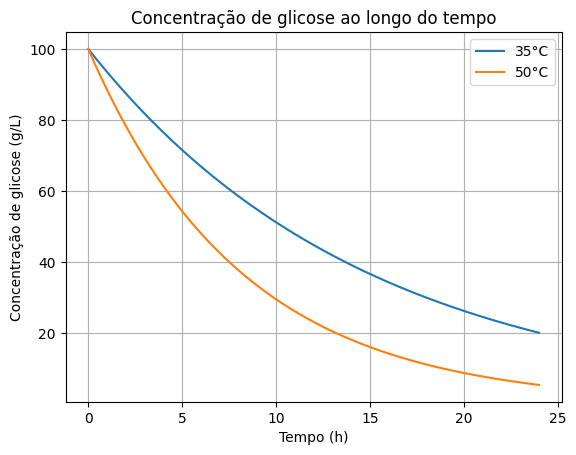

Concentração final a 35°C: 20.01 g/L
Concentração final a 50°C: 5.32 g/L


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

# Constantes
S0: int = 100  # g/L
tempo_horas: int = 24  #
T1: int = 35  # Temperatura em °C
T2: int = 50  #

def k(T: float) -> float:
    """
    Calcula a constante de taxa de reação k em função da temperatura T.

    Args:
        T (float): Temperatura em graus Celsius.

    Returns:
        float: A constante de taxa de reação k.
    """
    return 464.8 * np.exp(-3985 / (T + 273))

def simular_fermentacao(T: float, dt: float = 0.1) -> tuple[np.ndarray, np.ndarray]:
    """
    Simula a concentração de glicose ao longo do tempo durante a fermentação.

    Args:
        T (float): Temperatura em graus Celsius.
        dt (float): Passo de tempo para a simulação em minutos.

    Returns:
        tuple[np.ndarray, np.ndarray]: Uma tupla contendo dois arrays numpy:
                                       o tempo (em minutos) e a concentração de glicose (g/L).
    """
    t: np.ndarray = np.arange(0, tempo_horas * 60, dt)  # tempo em minutos
    S: np.ndarray = np.zeros_like(t)
    S[0] = S0
    taxa: float = k(T)

    for i in range(1, len(t)):
        S[i] = S[i-1] - taxa * S[i-1] * dt

    return t, S

# Simulações
t1, S1 = simular_fermentacao(T1)
t2, S2 = simular_fermentacao(T2)

# Plot
plt.plot(t1/60, S1, label='35°C')
plt.plot(t2/60, S2, label='50°C')
plt.xlabel('Tempo (h)')
plt.ylabel('Concentração de glicose (g/L)')
plt.title('Concentração de glicose ao longo do tempo')
plt.legend()
plt.grid(True)
plt.show()

print(f"Concentração final a 35°C: {S1[-1]:.2f} g/L")
print(f"Concentração final a 50°C: {S2[-1]:.2f} g/L")

**O que acontece se a temperatura for aumentada para 50°C?**

Se a temperatura for aumentada para 50ºC, a concentração final de glicose após 24 horas de fermentação será de 5.32 g/L. Em comparação, a 35ºC, a concentração final de glicose é de 20.01 g/L. Isso indica que o aumento da temperatura acelera o consumo de glicose no processo de fermentação. O gráfico acima ilustra a diminuição da concentração de glicose ao longo do tempo para ambas as temperaturas.

###  **Questão 4** – Equilíbrio em coluna de destilação com seletividade dependente da temperatura
**Escreva um código modular que calcule e exiba a seletividade αi em cada estágio e a fração yi com base nos dados acima.**

In [ ]:
from dataclasses import dataclass

@dataclass
class Estagio:
    """
    Representa um estágio em uma coluna de destilação.

    Attributes:
        xi (float): Fração molar do componente mais volátil na fase líquida.
        Ti (float): Temperatura do estágio em graus Celsius.
    """
    xi: float
    Ti: float

def alpha(T: float) -> float:
    """
    Calcula a volatilidade relativa alfa em função da temperatura T.

    Args:
        T (float): Temperatura em graus Celsius.

    Returns:
        float: A volatilidade relativa alfa.
    """
    return 2.5 - 0.01 * (T - 78)

def yi(alpha_i: float, xi: float) -> float:
    """
    Calcula a fração molar do componente mais volátil na fase vapor (yi)
    em equilíbrio com a fase líquida (xi), usando a volatilidade relativa (alpha_i).

    Args:
        alpha_i (float): Volatilidade relativa do estágio.
        xi (float): Fração molar do componente mais volátil na fase líquida.

    Returns:
        float: A fração molar do componente mais volátil na fase vapor (yi).
    """
    return (alpha_i * xi) / (1 + (alpha_i - 1) * xi)

# Dados dos estágios
estagios: list[Estagio] = [
    Estagio(xi=0.20, Ti=78),
    Estagio(xi=0.40, Ti=80),
    Estagio(xi=0.60, Ti=85)
]

# Cálculo e exibição
for i, estagio in enumerate(estagios, start=1):
    a: float = alpha(estagio.Ti)
    y: float = yi(a, estagio.xi)
    print(f"Estágio {i}: α = {a:.3f}, yi = {y:.3f}")

Estágio 1: α = 2.500, yi = 0.385
Estágio 2: α = 2.480, yi = 0.623
Estágio 3: α = 2.430, yi = 0.785
